# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Observations
---------------------

* 1) We can see from our regression analysis that there are strong correlations between latitude and temperature.
------------------------------------------------------------------------------------------------------------------------------
* 2) We can see from the regression analysis that there is correlation between latitude and the other relationships, but they have weak correlation. While latitude might have some impact, there are several other geographical factors that might have a greater impact.
------------------------------------------------------------------------------------------------------------------------------
* 3) The number of cities greatly favored the Northern Hemisphere data. This was due to randomly generating the latitude coordinates at the beginning of the code. I feel like we got a more accurate sample of Northern Hemisphere weather data when compared to Southern Hemisphere data. We could run the code a few more times or at greater quantity to see how the data might have changed.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import json
from api_keys import weather_api_key
from citipy import citipy
import random
import decimal
import time

## Generate Cities List

In [3]:
#set up latitude and longitude lists
latitude_list = []
longitude_list = []

# Generate 5000 random latitude and logitude values and add them to there respective list
for x in range(0, 5000):
    latitude = float(decimal.Decimal(random.randrange(-9000, 9000))/100)
    longitude = float(decimal.Decimal(random.randrange(-18000, 18000))/100)
    latitude_list.append(latitude)
    longitude_list.append(longitude)

# Set up the Weather DF
weather_df = pd.DataFrame({"Latitude": latitude_list, "Longitude": longitude_list})

# set up list to hold city names and what there country there from
city_list = []
country_list = []

# goes through each value of Latitude and Longitude in the Weather DF and uses the value as inputs to determin there city and country
for a in range(0, len(weather_df["Latitude"])):
    lat_value = weather_df.iloc[a]["Latitude"]
    long_value = weather_df.iloc[a]["Longitude"]    
    city_cord = citipy.nearest_city(lat_value, long_value)
    city_name = city_cord.city_name
    city_list.append(city_name)
    country = city_cord.country_code
    country_list.append(country)

    
# adds the city and country lists into our weather data frame, and then a touch of formatting   
weather_df["City"] = city_list
weather_df["Country"] = country_list
weather_df["City"] = weather_df["City"].str.title()
weather_df["Country"] = weather_df["Country"].str.upper()


#drop duplicates duplicates
weather_df = weather_df.drop_duplicates(subset=["City", "Country"], keep="first")
weather_df = weather_df.reset_index(drop=True)

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df.index)))


Total number of unique cities in weather dataframe is: 1400


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up list for variables we want
temperature_list = [] 
humidity_list = []
cloudiness_list = []
wind_speed_list = []
date_list = []
latitude_list_v2 = []
longitude_list_v2 = []
city_list_v2 = []
country_list_v2 = []

# Base URL before adding variable componets
url = "http://api.openweathermap.org/data/2.5/weather?"

    

for target in range(0, len(weather_df.index)):
    
    # Select city on weather DF, and formate for proper url code in event city has spaces in name
    display_city = weather_df.iloc[target]["City"]
    display_country = weather_df.iloc[target]["Country"]
    target_city = weather_df.iloc[target]["City"]
    target_city = target_city.replace(" ","+")
    
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={target_city}&units=imperial"
    
    # Use URL to make a request of information, bring back in the json format, and print URL
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(f"Currently on {(target + 1)} out of {(len(weather_df.index))} |::| City: {display_city}, {display_country}")

    
    # This will collect and store desired information, but if there is an error it will print a line and move on to next
    try:
        cities_temp = weather_json["main"]["temp"]
        temperature_list.append(cities_temp)
        
        cities_humid = weather_json["main"]["humidity"]
        humidity_list.append(cities_humid)
        
        cities_cloud = weather_json["clouds"]["all"]
        cloudiness_list.append(cities_cloud)
        
        cities_wind = weather_json["wind"]["speed"]
        wind_speed_list.append(cities_wind)
        
        cities_date = weather_json["dt"]
        date_list.append(cities_date)
        
        cities_lat_update = weather_json["coord"]["lat"]
        latitude_list_v2.append(cities_lat_update)
        
        cities_long_update = weather_json["coord"]["lon"]
        longitude_list_v2.append(cities_long_update)
        
        cities_city_update = weather_json["name"]
        city_list_v2.append(cities_city_update)
        
        cities_con_update = weather_json["sys"]["country"]       
        country_list_v2.append(cities_con_update)
        
    except:
        print("I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.")
        
        # Usuccessful API request will result in a blank value in list that will throw off list alignment
        # We will but in a dummy value in its place to clean out later
        temperature_list.append("Error")
        humidity_list.append("Error")
        cloudiness_list.append("Error")
        wind_speed_list.append("Error")
        date_list.append("Error")
        latitude_list_v2.append("Error")
        longitude_list_v2.append("Error")
        city_list_v2.append("Error")
        country_list_v2.append("Error")
        
        
    print()
    
    # Add a sleep timer to prevent my API requests from going over 60 per min and causing a 1 hour lock out.
    time.sleep(1) # in seconds



Currently on 1 out of 1400 |::| City: Illoqqortoormiut, GL
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 2 out of 1400 |::| City: Irbeyskoye, RU

Currently on 3 out of 1400 |::| City: Saint-Philippe, RE

Currently on 4 out of 1400 |::| City: Hobart, AU

Currently on 5 out of 1400 |::| City: Hermanus, ZA

Currently on 6 out of 1400 |::| City: Bredasdorp, ZA

Currently on 7 out of 1400 |::| City: Castro, CL

Currently on 8 out of 1400 |::| City: Ushuaia, AR

Currently on 9 out of 1400 |::| City: Haikou, CN

Currently on 10 out of 1400 |::| City: Yellowknife, CA

Currently on 11 out of 1400 |::| City: Tramandai, BR

Currently on 12 out of 1400 |::| City: Awjilah, LY

Currently on 13 out of 1400 |::| City: Paamiut, GL

Currently on 14 out of 1400 |::| City: Saskylakh, RU

Currently on 15 out of 1400 |::| City: Mataura, PF

Currently on 16 out of 1400 |::| City: Tabiauea, KI
I'm afraid I can't do that Dave. There seems to have bee

Currently on 135 out of 1400 |::| City: Margate, ZA

Currently on 136 out of 1400 |::| City: Gorno-Altaysk, RU

Currently on 137 out of 1400 |::| City: Stornoway, GB

Currently on 138 out of 1400 |::| City: Tsihombe, MG
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 139 out of 1400 |::| City: San Rafael, AR

Currently on 140 out of 1400 |::| City: Havre-Saint-Pierre, CA

Currently on 141 out of 1400 |::| City: Punta Arenas, CL

Currently on 142 out of 1400 |::| City: Vila Franca Do Campo, PT

Currently on 143 out of 1400 |::| City: Caravelas, BR

Currently on 144 out of 1400 |::| City: Thompson, CA

Currently on 145 out of 1400 |::| City: Solikamsk, RU

Currently on 146 out of 1400 |::| City: Carnarvon, AU

Currently on 147 out of 1400 |::| City: Vizinga, RU

Currently on 148 out of 1400 |::| City: Zhanaozen, KZ

Currently on 149 out of 1400 |::| City: Klyuchi, RU

Currently on 150 out of 1400 |::| City: Kalamata, GR

Currentl

Currently on 259 out of 1400 |::| City: Pontianak, ID

Currently on 260 out of 1400 |::| City: Karratha, AU

Currently on 261 out of 1400 |::| City: San Quintin, MX

Currently on 262 out of 1400 |::| City: Coahuayana, MX

Currently on 263 out of 1400 |::| City: Adrar, DZ

Currently on 264 out of 1400 |::| City: Ayorou, NE

Currently on 265 out of 1400 |::| City: Severnoye, RU

Currently on 266 out of 1400 |::| City: Cockburn Town, TC

Currently on 267 out of 1400 |::| City: Khatanga, RU

Currently on 268 out of 1400 |::| City: Morant Bay, JM

Currently on 269 out of 1400 |::| City: Nizhneyansk, RU
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 270 out of 1400 |::| City: Seymchan, RU

Currently on 271 out of 1400 |::| City: Orangeburg, US

Currently on 272 out of 1400 |::| City: Prince Rupert, CA

Currently on 273 out of 1400 |::| City: Sterling, US

Currently on 274 out of 1400 |::| City: Teguise, ES

Currently on 275 out of 1

Currently on 398 out of 1400 |::| City: Ranong, TH

Currently on 399 out of 1400 |::| City: Pasighat, IN

Currently on 400 out of 1400 |::| City: Dolores, AR

Currently on 401 out of 1400 |::| City: Altay, CN

Currently on 402 out of 1400 |::| City: Saint-Joseph, RE

Currently on 403 out of 1400 |::| City: Bengkulu, ID

Currently on 404 out of 1400 |::| City: Namibe, AO

Currently on 405 out of 1400 |::| City: Sao Joao Da Barra, BR

Currently on 406 out of 1400 |::| City: Belyy Yar, RU

Currently on 407 out of 1400 |::| City: Dublin, US

Currently on 408 out of 1400 |::| City: Mattoon, US

Currently on 409 out of 1400 |::| City: Crab Hill, BB
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 410 out of 1400 |::| City: Saint-Pierre, PM

Currently on 411 out of 1400 |::| City: Altagracia De Orituco, VE

Currently on 412 out of 1400 |::| City: Gonbad-E Qabus, IR

Currently on 413 out of 1400 |::| City: Elko, US

Currently on 414 out

Currently on 537 out of 1400 |::| City: Balakhninskiy, RU

Currently on 538 out of 1400 |::| City: Talara, PE

Currently on 539 out of 1400 |::| City: Micheweni, TZ

Currently on 540 out of 1400 |::| City: Alice Springs, AU

Currently on 541 out of 1400 |::| City: Bagan, RU

Currently on 542 out of 1400 |::| City: Contai, IN

Currently on 543 out of 1400 |::| City: Poum, NC

Currently on 544 out of 1400 |::| City: Denpasar, ID

Currently on 545 out of 1400 |::| City: Sept-Iles, CA

Currently on 546 out of 1400 |::| City: Sao Miguel Do Oeste, BR
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 547 out of 1400 |::| City: Ust-Nera, RU

Currently on 548 out of 1400 |::| City: Verkhoyansk, RU

Currently on 549 out of 1400 |::| City: Bougouni, ML

Currently on 550 out of 1400 |::| City: Chara, RU

Currently on 551 out of 1400 |::| City: Samarai, PG

Currently on 552 out of 1400 |::| City: Babanusah, SD
I'm afraid I can't do that Dave.

Currently on 668 out of 1400 |::| City: Honningsvag, NO

Currently on 669 out of 1400 |::| City: Salym, RU

Currently on 670 out of 1400 |::| City: Dosso, NE

Currently on 671 out of 1400 |::| City: Calbuco, CL

Currently on 672 out of 1400 |::| City: Itarema, BR

Currently on 673 out of 1400 |::| City: Manta, EC

Currently on 674 out of 1400 |::| City: Osmena, PH

Currently on 675 out of 1400 |::| City: Cairns, AU

Currently on 676 out of 1400 |::| City: Xianshuigu, CN

Currently on 677 out of 1400 |::| City: Virudunagar, IN

Currently on 678 out of 1400 |::| City: Ponta Do Sol, PT

Currently on 679 out of 1400 |::| City: Mandeville, US

Currently on 680 out of 1400 |::| City: Grimmen, DE

Currently on 681 out of 1400 |::| City: Merke, KZ

Currently on 682 out of 1400 |::| City: Price, US

Currently on 683 out of 1400 |::| City: Vanimo, PG

Currently on 684 out of 1400 |::| City: Vaitape, PF

Currently on 685 out of 1400 |::| City: Bombay, IN

Currently on 686 out of 1400 |::| City: K

Currently on 804 out of 1400 |::| City: Trostberg, DE

Currently on 805 out of 1400 |::| City: Parintins, BR

Currently on 806 out of 1400 |::| City: Oropesa, PE

Currently on 807 out of 1400 |::| City: Noumea, NC

Currently on 808 out of 1400 |::| City: Yebaishou, CN

Currently on 809 out of 1400 |::| City: Ajdabiya, LY

Currently on 810 out of 1400 |::| City: Gelemso, ET

Currently on 811 out of 1400 |::| City: Urucui, BR

Currently on 812 out of 1400 |::| City: Hay River, CA

Currently on 813 out of 1400 |::| City: Esmeralda, CU

Currently on 814 out of 1400 |::| City: Priladozhskiy, RU

Currently on 815 out of 1400 |::| City: Caxito, AO

Currently on 816 out of 1400 |::| City: Xining, CN

Currently on 817 out of 1400 |::| City: Ugoofaaru, MV

Currently on 818 out of 1400 |::| City: Wawa, CA

Currently on 819 out of 1400 |::| City: Usoke, TZ

Currently on 820 out of 1400 |::| City: Dhilwan, IN

Currently on 821 out of 1400 |::| City: Goma, CD

Currently on 822 out of 1400 |::| City:

Currently on 938 out of 1400 |::| City: Ratnagiri, IN

Currently on 939 out of 1400 |::| City: Tevaitoa, PF

Currently on 940 out of 1400 |::| City: Verkhnyaya Toyma, RU

Currently on 941 out of 1400 |::| City: Kamenka, RU

Currently on 942 out of 1400 |::| City: Ashland, US

Currently on 943 out of 1400 |::| City: Sisimiut, GL

Currently on 944 out of 1400 |::| City: Tongliao, CN

Currently on 945 out of 1400 |::| City: Barmer, IN

Currently on 946 out of 1400 |::| City: Kawerau, NZ

Currently on 947 out of 1400 |::| City: Trelew, AR

Currently on 948 out of 1400 |::| City: Nanchong, CN

Currently on 949 out of 1400 |::| City: Xuddur, SO

Currently on 950 out of 1400 |::| City: Barcelona, PH

Currently on 951 out of 1400 |::| City: Mitsamiouli, KM

Currently on 952 out of 1400 |::| City: Erikoussa, GR
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 953 out of 1400 |::| City: Smithers, CA

Currently on 954 out of 1400 |::| City

Currently on 1071 out of 1400 |::| City: Ginda, ER

Currently on 1072 out of 1400 |::| City: Teguldet, RU

Currently on 1073 out of 1400 |::| City: Envira, BR

Currently on 1074 out of 1400 |::| City: Leh, IN

Currently on 1075 out of 1400 |::| City: Clarksville, US

Currently on 1076 out of 1400 |::| City: Iquique, CL

Currently on 1077 out of 1400 |::| City: Peace River, CA

Currently on 1078 out of 1400 |::| City: Homer, US

Currently on 1079 out of 1400 |::| City: Yumen, CN

Currently on 1080 out of 1400 |::| City: Ibra, OM

Currently on 1081 out of 1400 |::| City: Padang, ID

Currently on 1082 out of 1400 |::| City: Bocas Del Toro, PA

Currently on 1083 out of 1400 |::| City: Changtu, CN

Currently on 1084 out of 1400 |::| City: Murgab, TM

Currently on 1085 out of 1400 |::| City: Uthal, PK

Currently on 1086 out of 1400 |::| City: Pagudpud, PH

Currently on 1087 out of 1400 |::| City: Malpura, IN

Currently on 1088 out of 1400 |::| City: Bud, NO

Currently on 1089 out of 1400 |::

Currently on 1209 out of 1400 |::| City: Cody, US

Currently on 1210 out of 1400 |::| City: Chern, RU

Currently on 1211 out of 1400 |::| City: Tyup, KG

Currently on 1212 out of 1400 |::| City: Nanuque, BR

Currently on 1213 out of 1400 |::| City: Lerwick, GB

Currently on 1214 out of 1400 |::| City: Abu Zabad, SD

Currently on 1215 out of 1400 |::| City: Muscat, OM

Currently on 1216 out of 1400 |::| City: Lazaro Cardenas, MX

Currently on 1217 out of 1400 |::| City: Yugorsk, RU

Currently on 1218 out of 1400 |::| City: Ahipara, NZ

Currently on 1219 out of 1400 |::| City: Poole, GB

Currently on 1220 out of 1400 |::| City: Kuruman, ZA

Currently on 1221 out of 1400 |::| City: Balakhta, RU

Currently on 1222 out of 1400 |::| City: Bol, TD

Currently on 1223 out of 1400 |::| City: Bowen, AU

Currently on 1224 out of 1400 |::| City: Manjeshwar, IN

Currently on 1225 out of 1400 |::| City: Gilbues, BR

Currently on 1226 out of 1400 |::| City: Sawakin, SD

Currently on 1227 out of 1400 |

Currently on 1347 out of 1400 |::| City: Bodo, NO

Currently on 1348 out of 1400 |::| City: Kathmandu, NP

Currently on 1349 out of 1400 |::| City: Erzin, RU

Currently on 1350 out of 1400 |::| City: Kabanjahe, ID

Currently on 1351 out of 1400 |::| City: Sudzha, RU

Currently on 1352 out of 1400 |::| City: Rabo De Peixe, PT

Currently on 1353 out of 1400 |::| City: Tura, RU

Currently on 1354 out of 1400 |::| City: Franklin, US

Currently on 1355 out of 1400 |::| City: Andenes, NO

Currently on 1356 out of 1400 |::| City: Lokoja, NG

Currently on 1357 out of 1400 |::| City: Preobrazheniye, RU

Currently on 1358 out of 1400 |::| City: Nsanje, MW

Currently on 1359 out of 1400 |::| City: Saryshagan, KZ
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next city.

Currently on 1360 out of 1400 |::| City: Rutland, US

Currently on 1361 out of 1400 |::| City: Tawzar, TN
I'm afraid I can't do that Dave. There seems to have been an error. Let's try the next ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Add collected weather data to Weather DF
weather_df["Temperature (F)"] = temperature_list
weather_df["Humidity (%)"] = humidity_list
weather_df["Cloud Cover (%)"] = cloudiness_list
weather_df["Wind Speed (MPH)"] = wind_speed_list
weather_df["Date (UTC)"] = date_list
weather_df["Latitude"] = latitude_list_v2
weather_df["Longitude"] = longitude_list_v2
weather_df["City"] = city_list_v2
weather_df["Country"] = country_list_v2

# Drop rows where we assigned Error too, because there was no data to pull
weather_df_v2 = weather_df[weather_df["Temperature (F)"] != "Error"]

# Reset Index after removing errors
weather_df_v2 = weather_df_v2.reset_index(drop=True)

# Save DF as .csv
weather_df_v2.to_csv("weather_data.csv")

print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
weather_df_v2.head(5)

Total number of unique cities in weather dataframe is: 1297


Latitude Longitude            City Country Temperature (F) Humidity (%)  \
0    55.64     95.45      Irbeyskoye      RU           32.67           88   
1   -21.36     55.77  Saint-Philippe      RE           62.92           64   
2   -42.88    147.33          Hobart      AU           64.71           54   
3   -34.42     19.23        Hermanus      ZA           62.01           72   
4   -34.53     20.04      Bredasdorp      ZA            62.6           59   

  Cloud Cover (%) Wind Speed (MPH)  Date (UTC)  
0              41            12.03  1603932457  
1               0             5.82  1603931947  
2              25             1.99  1603931762  
3             100             1.01  1603931918  
4             100             2.24  1603931919

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get list of the indices of cities that have humidity over 100%.

over_100 = weather_df_v2.index[weather_df_v2["Humidity (%)"] > 100].tolist()
print(over_100)

[]


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df_v2.drop(over_100)


clean_city_data = clean_city_data.reset_index(drop=True)
print("Total number of unique cities in weather dataframe is: " + str(len(weather_df_v2.index)))
clean_city_data.head(100)

Total number of unique cities in weather dataframe is: 1297


Latitude Longitude               City Country Temperature (F) Humidity (%)  \
0     55.64     95.45         Irbeyskoye      RU           32.67           88   
1    -21.36     55.77     Saint-Philippe      RE           62.92           64   
2    -42.88    147.33             Hobart      AU           64.71           54   
3    -34.42     19.23           Hermanus      ZA           62.01           72   
4    -34.53     20.04         Bredasdorp      ZA            62.6           59   
..      ...       ...                ...     ...             ...          ...   
95    38.69     35.55              Talas      TR           53.17           63   
96       49     -64.4  Riviere-au-Renard      CA           29.14           89   
97    -8.84     13.23             Luanda      AO           75.58           87   
98    38.52     -28.7     Ribeira Grande      PT           67.64           86   
99    -33.7    -53.46               Chui      UY           56.28           80   

   Cloud Cover (%) Wind Speed (MPH)  Date (UTC)  
0               41            12.03  1603932457  
1                0             5.82  1603931947  
2               25             1.99  1603931762  
3              100             1.01  1603931918  
4              100             2.24  1603931919  
..             ...              ...         ...  
95               0             2.35  1603932573  
96             100            10.92  1603932336  
97             100             8.01  1603932575  
98              64            21.21  1603932576  
99              55             10.4  1603932578  

[100 rows x 9 columns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

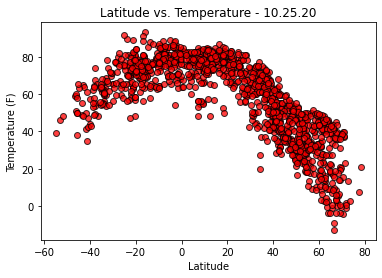

In [8]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Temperature (F)"]

# Create Scatter Plot
fig_1 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

fig_1.figure.savefig('lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

## Latitude vs. Humidity Plot

This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

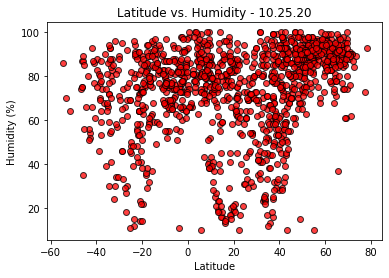

In [9]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Humidity (%)"]

# Create Scatter Plot
fig_2 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

fig_2.figure.savefig('lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Cloudiness Plot

This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

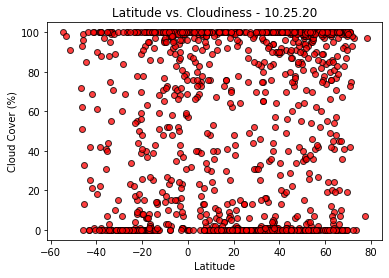

In [10]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Cloud Cover (%)"]

# Create Scatter Plot
fig_3 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

fig_3.figure.savefig('lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

## Latitude vs. Wind Speed Plot

This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

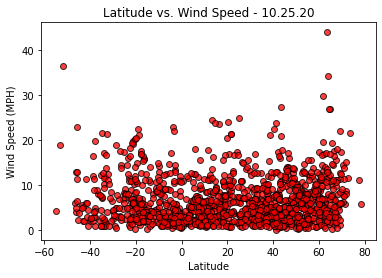

In [11]:
# Set Axises
x_axis = clean_city_data["Latitude"]
y_axis = clean_city_data["Wind Speed (MPH)"]

# Create Scatter Plot
fig_4 = plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

fig_4.figure.savefig('lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

## Linear Regression

In [12]:
# Set Clean City DF to North and South Hemispheres
north_hem = clean_city_data[clean_city_data["Latitude"] > 0]
south_hem = clean_city_data[clean_city_data["Latitude"] < 0]
print("Total number of unique cities in Northern Hemisphere is: " + str(len(north_hem.index)))
print("Total number of unique cities in Southern Hemisphere is: " + str(len(south_hem.index)))

Total number of unique cities in Northern Hemisphere is: 934
Total number of unique cities in Southern Hemisphere is: 363


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.86
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

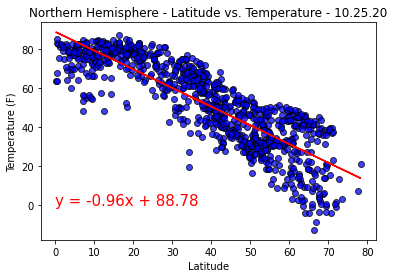

In [13]:
# Set Axises

x_axis = north_hem["Latitude"]
y_axis = north_hem["Temperature (F)"]

# Create Scatter Plot
fig_5 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Northern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")




fig_5.figure.savefig('n_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.69
This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.


<function matplotlib.pyplot.show(*args, **kw)>

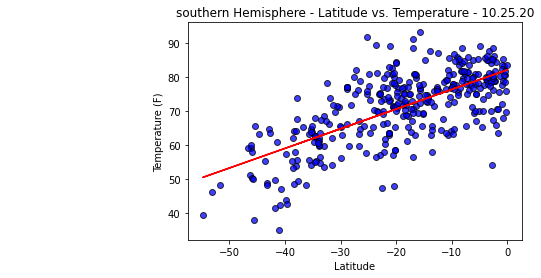

In [14]:
# Set Axises

x_axis = south_hem["Latitude"]
y_axis = south_hem["Temperature (F)"]

# Create Scatter Plot
fig_6 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("southern Hemisphere - Latitude vs. Temperature - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90, 90),fontsize=15,color="red")




fig_6.figure.savefig('s_hem_lat_v_temp.png')

print("This plot is comparing the latitude and temperature of each city in the data frame. We can see that as latitude is closer to zero, the equator, the higher the temperature is.")

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.32
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

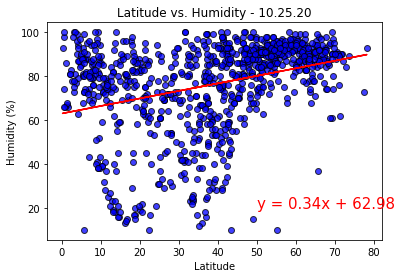

In [15]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Humidity (%)"]

# Create Scatter Plot
fig_7 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")



fig_7.figure.savefig('n_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.18
This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

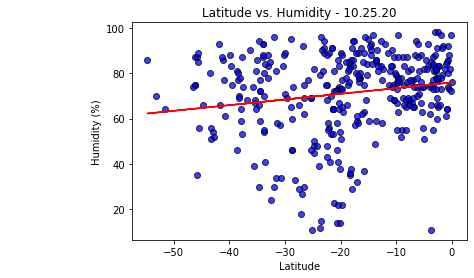

In [16]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Humidity (%)"]

# Create Scatter Plot
fig_8 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Humidity - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")


fig_8.figure.savefig('s_hem_lat_v_humid.png')

print("This plot is comparing the latitude and humidity of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.16
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

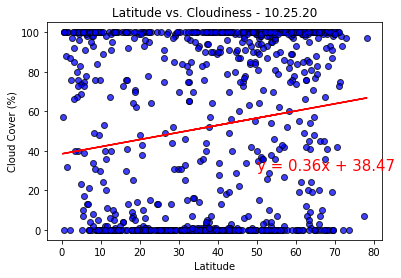

In [17]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_9 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")



fig_9.figure.savefig('n_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.19
This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

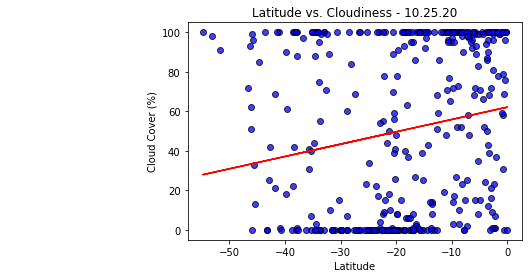

In [18]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Cloud Cover (%)"]

# Create Scatter Plot
fig_10 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Cloudiness - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,20),fontsize=15,color="red")




fig_10.figure.savefig('s_hem_lat_v_cloud.png')


print("This plot is comparing the latitude and cloudiness of each city in the data frame. There does not seem to be much of a relationship.")



plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.14
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

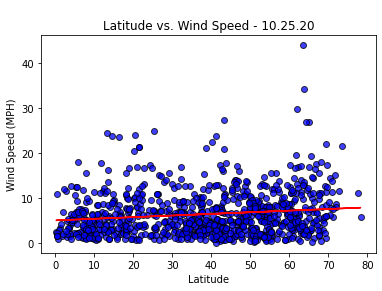

In [19]:
# Set Axises
x_axis = north_hem["Latitude"]
y_axis = north_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_11 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


fig_11.figure.savefig('n_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.16
This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.


<function matplotlib.pyplot.show(*args, **kw)>

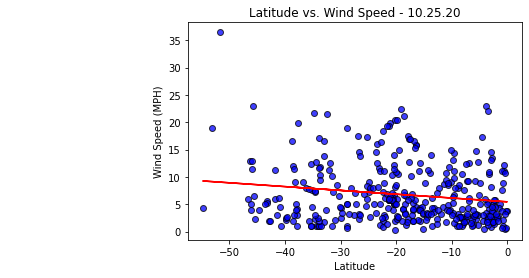

In [20]:
# Set Axises
x_axis = south_hem["Latitude"]
y_axis = south_hem["Wind Speed (MPH)"]

# Create Scatter Plot
fig_12 = plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set Lables and other
plt.title("Latitude vs. Wind Speed - 10.25.20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# calculate correlation coefficient
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# calculates the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float) ,y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-90,18),fontsize=15,color="red")


fig_12.figure.savefig('s_hem_lat_v_wind.png')


print("This plot is comparing the latitude and wind speed of each city in the data frame. There does not seem to be much of a relationship.")




plt.show